In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# h=pd.read_csv("data/h.txt",sep='\t')
# m=pd.read_csv("data/m.txt",sep='\t')
# o=pd.read_csv("data/o.txt",sep='\t')
# p=pd.read_csv("data/p.txt",sep='\t')
cur="results/p"
res=pd.read_csv("results/res-protein.csv",sep=',')
snp=pd.read_csv("SNPs.csv",sep=' ',header=None)
samples=pd.read_csv("samples.csv",sep=',',header=None)

In [30]:
print(snp.shape,samples.shape,res.shape)

(4236, 2) (5138, 1) (4236, 6)


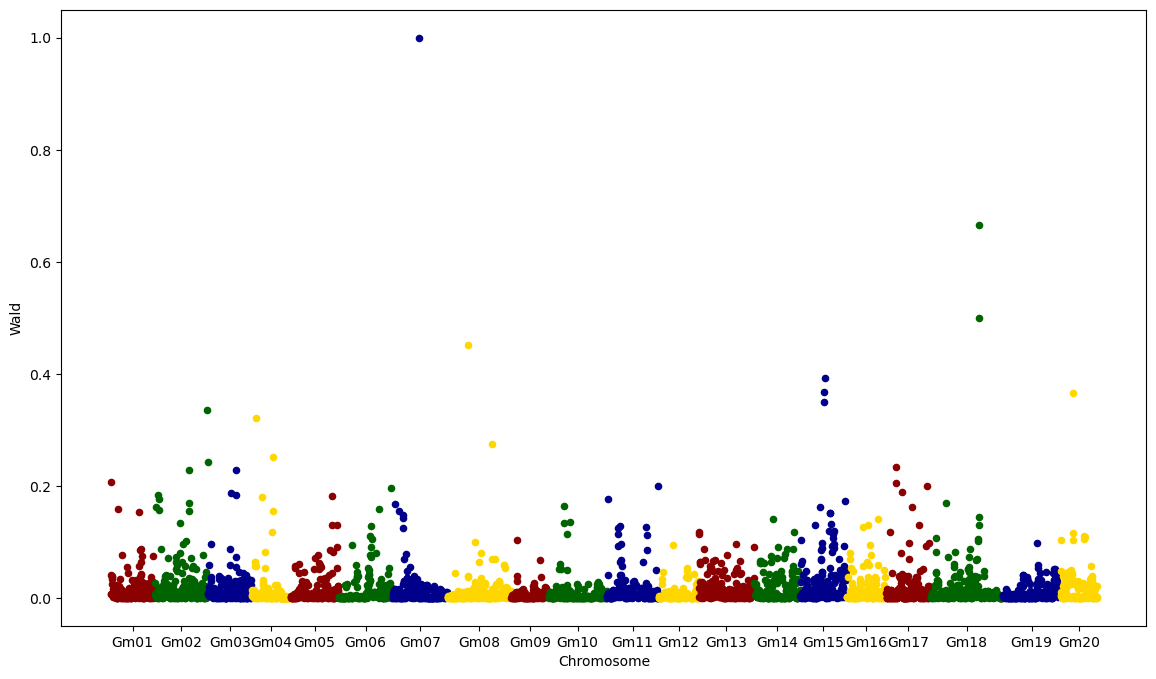

In [31]:
df=res
df.chr = df.chr.astype('category')
df = df.sort_values('chr')
df['wald']=df['wald']/df['wald'].max()
# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['ind'] = range(len(df))
df_grouped = df.groupby(('chr'))

# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['darkred','darkgreen','darkblue', 'gold']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='wald',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)
# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('Wald')

# show the graph
plt.show()
sv=cur+"_wald.png"
fig.savefig(sv,bbox_inches='tight')

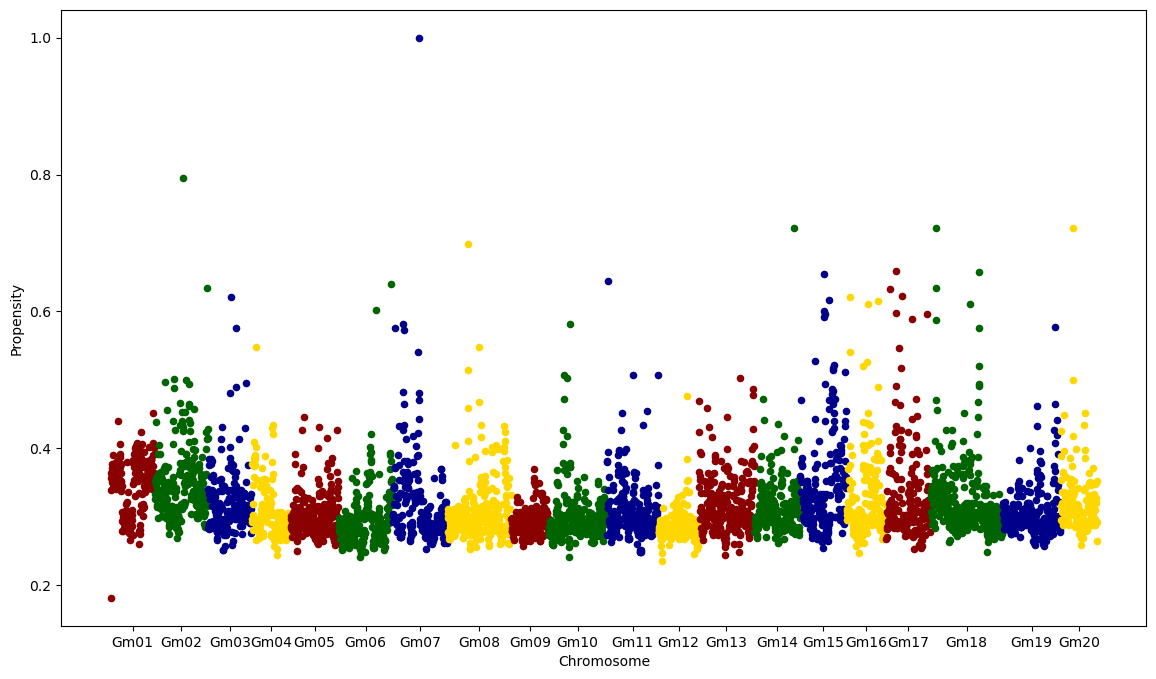

In [32]:
df=res
df.chr = df.chr.astype('category')
df = df.sort_values('chr')
df['prop']=df['prop']/df['prop'].max()
# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['ind'] = range(len(df))
df_grouped = df.groupby(('chr'))

# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['darkred','darkgreen','darkblue', 'gold']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='prop',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)
# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('Propensity')

# show the graph
plt.show()
sv=cur+"_prop.png"
fig.savefig(sv,bbox_inches='tight')